In this notebook, we verify the role the Universal Approximation Theorem which states that NN can approximate a large class of functions (continuous and bounded functions).

We investigate two types of functions:
1. A order 5 polynomial with a log dependence
2. A sigmoid-like function

We vary the number of nodes and layers for each fit to determine their impact on the final fit, and we display the averaged output of each layer.

# Import Libraries and Files

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras import Model
from tensorflow.keras import layers
import keras.backend as K

import numpy as np

import matplotlib.pyplot as plt

# Nonlinear model: Log + $O(x^5)$

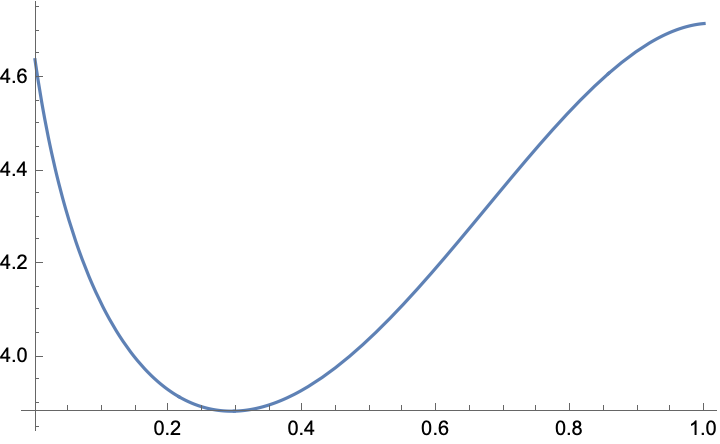

\begin{equation}
f(x) = \pi - \frac{1}{2} \log(x+1/20) + \frac{21}{10}x^2 + \frac{18}{10}x^3 - \frac{5}{2} x^4 + \frac{2}{10}x^5
\end{equation}

In [36]:
# Toy model parameters
trainX=list(np.arange(0, 1, 0.002, dtype=np.float64))
trainX_true=list([np.pi - 1/2*np.log(x+1/20)+(21/10)*x**2 + (18/10)*x**3 - (5/2)*x**4 +(2/10)* x**5 for x in trainX])

validX=list(np.arange(0, 1, np.pi/1000, dtype=np.float64))
validX_true=list([np.pi - 1/2*np.log(x+1/20)+(21/10)*x**2 + (18/10)*x**3 - (5/2)*x**4 +(2/10)* x**5 for x in trainX])

Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 7.4286 - mse: 7.4286
Epoch 2/50
16/16 [==============================] - 0s 9ms/step - loss: 1.6207 - mse: 1.6207
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5780 - mse: 0.5780
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 0.2284 - mse: 0.2284
Epoch 5/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0644 - mse: 0.0644
Epoch 6/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0381 - mse: 0.0381
Epoch 7/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0358 - mse: 0.0358
Epoch 8/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0347 - mse: 0.0347
Epoch 9/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0343 - mse: 0.0343
Epoch 10/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0310 - mse: 0.0310
Epoch 11/50
16/16 [==============================] - 0s 11ms/step

<function matplotlib.pyplot.show(close=None, block=None)>

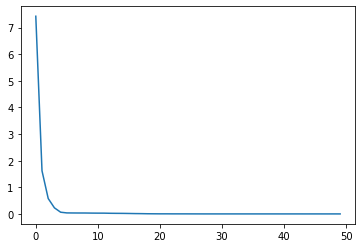

In [37]:
model_test=Sequential()
model_test.add(Dense(2048, input_dim = 1, activation='relu'))
model_test.add(Dense(1024, activation='relu'))
model_test.add(Dense(512, activation='relu'))
model_test.add(Dense(256, activation='relu'))
#model_test.add(Dense(256, activation='relu'))
model_test.add(Dense(128, activation='relu'))
model_test.add(Dense(64, activation='relu'))
model_test.add(Dense(32, activation='relu'))
model_test.add(Dense(1, activation='relu'))
model_test.compile(loss='mse', optimizer='Adam', metrics=['mse'])
history=model_test.fit(x=trainX, y=trainX_true, epochs=50, verbose=1)
loss_history = history.history["loss"]
plt.plot(loss_history)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

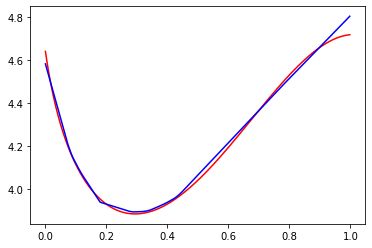

In [38]:
predictions=model_test.predict(trainX)
plt.plot(trainX, trainX_true , label = 'true data', color = 'r')
plt.plot(trainX, predictions , label = 'prediction', color = 'b')
plt.show

Based on these tests, depth reveals non-linearity


In [286]:
len(model_test.layers)

8

In [293]:
model_layer=[]
prediction_layer=[]
weights=[]
for i,layer in enumerate(model_test.layers):
    model_layer.append(Model(model_test.input , model_test.layers[i].output))
    #print(np.shape(model_test.layers[i].weights[0]),np.shape(model_test.layers[i].weights[1]))
    weights.append(model_test.layers[i].weights)
    prediction_layer.append(model_layer[i].predict(trainX))

<function matplotlib.pyplot.show(close=None, block=None)>

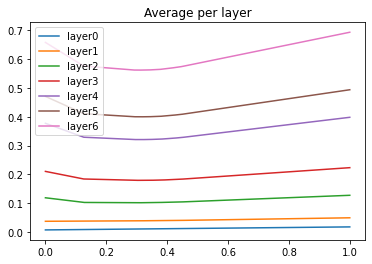

In [294]:
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[0],1),1), label='layer0')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[1],1),1), label='layer1')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[2],1),1), label='layer2')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[3],1),1), label='layer3')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[4],1),1), label='layer4')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[5],1),1), label='layer5')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[6],1),1), label='layer6')
#plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[7],1),1), label='layer7')
plt.title("Average per layer")
plt.legend()
plt.show

Let's try the infinite width limit; see next section for a more in-depth analysis of the Sigmoid function

Epoch 1/50
16/16 [==============================] - 0s 2ms/step - loss: 8.4409 - mse: 8.4409
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 1.3146 - mse: 1.3146
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3149 - mse: 0.3149
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1792 - mse: 0.1792
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1062 - mse: 0.1062
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0647 - mse: 0.0647
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0489 - mse: 0.0489
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0426 - mse: 0.0426
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0401 - mse: 0.0401
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - lo

<function matplotlib.pyplot.show(close=None, block=None)>

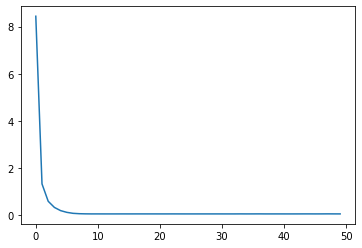

In [413]:
model_test=Sequential()
model_test.add(Dense(23170, input_dim = 1, activation='relu'))
model_test.add(Dense(1, activation='relu'))
model_test.compile(loss='mse', optimizer='Adam', metrics=['mse'])
history=model_test.fit(x=trainX, y=trainX_true, epochs=50, verbose=1)
loss_history = history.history["loss"]
plt.plot(loss_history)
plt.show

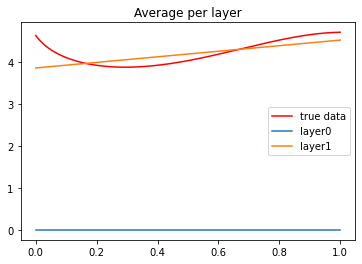

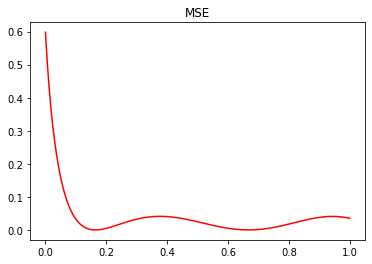

In [414]:
model_layer=[]
prediction_layer=[]
for i,layer in enumerate(model_test.layers):
    model_layer.append(Model(model_test.input , model_test.layers[i].output))
    prediction_layer.append(model_layer[i].predict(trainX))
    
plt.plot(trainX, trainX_true , 'r', label = 'true data')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[0],1),1), label='layer0')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[1],1),1), label='layer1')
#plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[3],1),1), label='layer5')
plt.title("Average per layer")
plt.legend()
plt.show()

plt.plot(trainX, (trainX_true-np.mean(prediction_layer[1],1))**2 , 'r')
#plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[3],1),1), label='layer5')
plt.title("MSE")
plt.show()

Reduction in MSE is slow with a single layer

# Sigmoid Function

Now let's test a sigmoid-like function

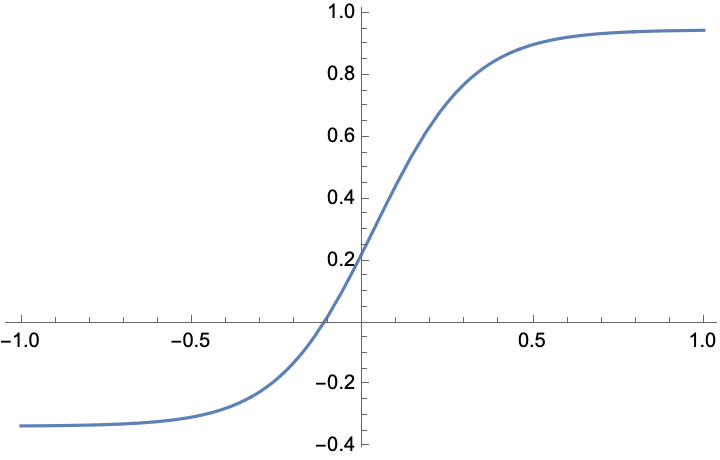

\begin{equation}
f(x) = \frac{1}{78/100 + \exp(-7x)} - 1/3
\end{equation}

The parameters are tuned in this equation such that it is non-zero at $x=0$, and $f(0 \leq x \leq 1)<1 $

In [40]:
# Toy model parameters
trainX=list(np.arange(0, 1, 0.002, dtype=np.float64))
trainX_true=list([1/( (78/100) + np.exp(-7*x))-1/3 for x in trainX])

validX=list(np.arange(0, 1, np.pi/1000, dtype=np.float64))
validX_true=list([1/( (78/100) + np.exp(-7*x))-1/3 for x in trainX])

<function matplotlib.pyplot.show(close=None, block=None)>

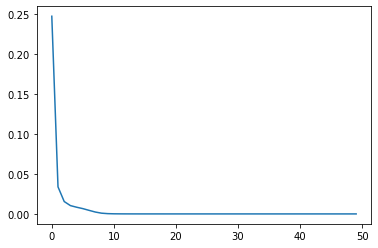

In [41]:
model_test=Sequential()
model_test.add(Dense(256, input_dim = 1, activation='relu'))
#model_test.add(Dense(2048, input_dim = 1, activation='relu'))
#model_test.add(Dense(256, activation='relu'))
#model_test.add(Dense(256, activation='relu'))
model_test.add(Dense(128, activation='relu'))
model_test.add(Dense(64, activation='relu'))
model_test.add(Dense(32, activation='relu'))
model_test.add(Dense(16, activation='relu'))
model_test.add(Dense(1, activation='relu'))
model_test.compile(loss='mse', optimizer='Adam', metrics=['mse'])
history=model_test.fit(x=trainX, y=trainX_true, epochs=50, verbose=0)
loss_history = history.history["loss"]
plt.plot(loss_history)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

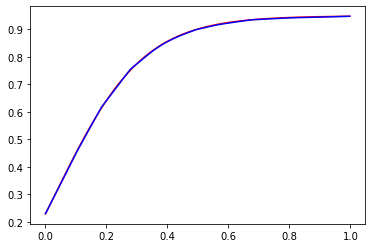

In [42]:
predictions=model_test.predict(trainX)
plt.plot(trainX, trainX_true , label = 'true data', color = 'r')
plt.plot(trainX, predictions , label = 'prediction', color = 'b')
plt.show

In [270]:
model_layer=[]
prediction_layer=[]
weights=[]
for i,layer in enumerate(model_test.layers):
    model_layer.append(Model(model_test.input , model_test.layers[i].output))
    #print(np.shape(model_test.layers[i].weights[0]),np.shape(model_test.layers[i].weights[1]))
    weights.append(model_test.layers[i].weights)
    #prediction_layer.append(model_layer[i].predict(trainX))
    #convWeight= weights[0][0]+ tf.transpose(tf.expand_dims(weights[0][1],1))
    #for j in range(1,i+1):
    #    convWeight= tf.tensordot(convWeight,weights[j][0]+ tf.transpose(tf.expand_dims(weights[j][1],1)),1)
    #    convWeight= tf.keras.activations.relu(convWeight)
    #convWeight= tf.transpose(convWeight)
    #prediction_layer.append(np.array(tf.tensordot(model_layer[i].predict(trainX),convWeight, 1)))
    prediction_layer.append(model_layer[i].predict(trainX))
    #print(np.shape(prediction_layer[i]))

<function matplotlib.pyplot.show(close=None, block=None)>

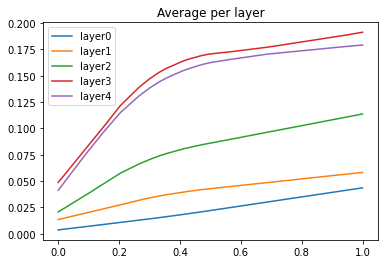

In [271]:
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[0],1),1), label='layer0')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[1],1),1), label='layer1')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[2],1),1), label='layer2')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[3],1),1), label='layer3')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[4],1),1), label='layer4')
#plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[3],1),1), label='layer5')
plt.title("Average per layer")
plt.legend()
plt.show

Observations:
* So the sigmoid rescales
* Better to incrementally decrease # of nodes by factors of 2
* A good solution can be found at an intermediate layer if we have too many layers

Testing with fewer nodes

Epoch 1/30
16/16 [==============================] - 0s 627us/step - loss: 0.4845 - mse: 0.4845
Epoch 2/30
16/16 [==============================] - 0s 791us/step - loss: 0.1258 - mse: 0.1258
Epoch 3/30
16/16 [==============================] - 0s 545us/step - loss: 0.0187 - mse: 0.0187
Epoch 4/30
16/16 [==============================] - 0s 617us/step - loss: 0.0134 - mse: 0.0134
Epoch 5/30
16/16 [==============================] - 0s 576us/step - loss: 0.0116 - mse: 0.0116
Epoch 6/30
16/16 [==============================] - 0s 632us/step - loss: 0.0107 - mse: 0.0107
Epoch 7/30
16/16 [==============================] - 0s 720us/step - loss: 0.0103 - mse: 0.0103
Epoch 8/30
16/16 [==============================] - 0s 587us/step - loss: 0.0101 - mse: 0.0101
Epoch 9/30
16/16 [==============================] - 0s 558us/step - loss: 0.0098 - mse: 0.0098
Epoch 10/30
16/16 [==============================] - 0s 636us/step - loss: 0.0097 - mse: 0.0097
Epoch 11/30
16/16 [==============================

<function matplotlib.pyplot.show(close=None, block=None)>

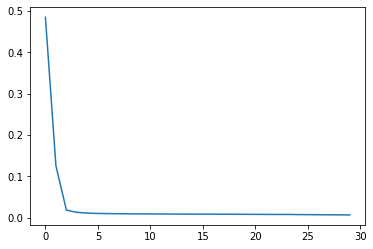

In [401]:
model_test=Sequential()
model_test.add(Dense(64, input_dim = 1, activation='relu'))
#model_test.add(Dense(2048, input_dim = 1, activation='relu'))
#model_test.add(Dense(256, activation='relu'))
#model_test.add(Dense(256, activation='relu'))
model_test.add(Dense(32, activation='relu'))
model_test.add(Dense(16, activation='relu'))
model_test.add(Dense(8, activation='relu'))
model_test.add(Dense(4, activation='relu'))
model_test.add(Dense(1, activation='relu'))
model_test.compile(loss='mse', optimizer='Adam', metrics=['mse'])
history=model_test.fit(x=trainX, y=trainX_true, epochs=30, verbose=1)
loss_history = history.history["loss"]
plt.plot(loss_history)
plt.show

In [374]:
model_layer=[]
prediction_layer=[]
for i,layer in enumerate(model_test.layers):
    model_layer.append(Model(model_test.input , model_test.layers[i].output))
    prediction_layer.append(model_layer[i].predict(trainX))

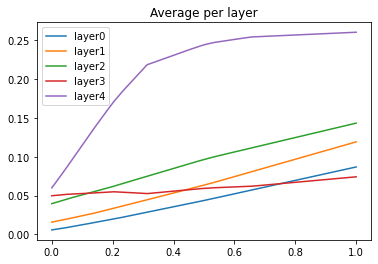

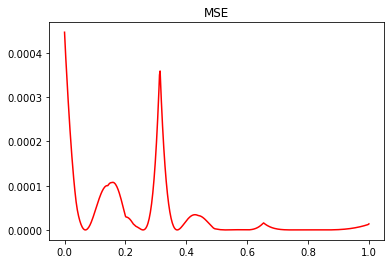

In [392]:
#plt.plot(trainX, trainX_true, label='True')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[0],1),1), label='layer0')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[1],1),1), label='layer1')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[2],1),1), label='layer2')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[3],1),1), label='layer3')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[4],1),1), label='layer4')
#plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[5],1),1), label='layer5')
plt.title("Average per layer")
plt.legend()
plt.show()
#plt.close()

plt.plot(trainX, (trainX_true-np.mean(prediction_layer[5],1))**2 , 'r')
#plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[3],1),1), label='layer5')
plt.title("MSE")
plt.show()

Epoch 1/30
16/16 [==============================] - 0s 698us/step - loss: 0.6752 - mse: 0.6752
Epoch 2/30
16/16 [==============================] - 0s 568us/step - loss: 0.6752 - mse: 0.6752
Epoch 3/30
16/16 [==============================] - 0s 585us/step - loss: 0.6752 - mse: 0.6752
Epoch 4/30
16/16 [==============================] - 0s 518us/step - loss: 0.6752 - mse: 0.6752
Epoch 5/30
16/16 [==============================] - 0s 666us/step - loss: 0.6752 - mse: 0.6752
Epoch 6/30
16/16 [==============================] - 0s 704us/step - loss: 0.6752 - mse: 0.6752
Epoch 7/30
16/16 [==============================] - 0s 500us/step - loss: 0.6752 - mse: 0.6752
Epoch 8/30
16/16 [==============================] - 0s 656us/step - loss: 0.6752 - mse: 0.6752
Epoch 9/30
16/16 [==============================] - 0s 742us/step - loss: 0.6752 - mse: 0.6752
Epoch 10/30
16/16 [==============================] - 0s 651us/step - loss: 0.6752 - mse: 0.6752
Epoch 11/30
16/16 [==============================

<function matplotlib.pyplot.show(close=None, block=None)>

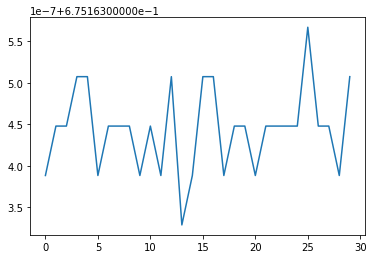

In [400]:
model_test=Sequential()
model_test.add(Dense(32, input_dim = 1, activation='relu'))
#model_test.add(Dense(2048, input_dim = 1, activation='relu'))
#model_test.add(Dense(256, activation='relu'))
#model_test.add(Dense(256, activation='relu'))
#model_test.add(Dense(32, activation='relu'))
model_test.add(Dense(16, activation='relu'))
model_test.add(Dense(8, activation='relu'))
model_test.add(Dense(4, activation='relu'))
model_test.add(Dense(2, activation='relu'))
model_test.add(Dense(1, activation='relu'))
model_test.compile(loss='mse', optimizer='Adam', metrics=['mse'])
history=model_test.fit(x=trainX, y=trainX_true, epochs=30, verbose=1)
loss_history = history.history["loss"]
plt.plot(loss_history)
plt.show

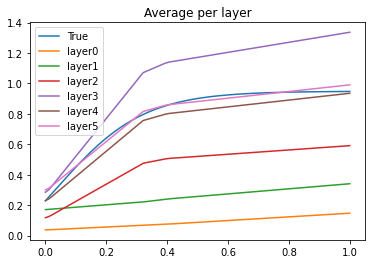

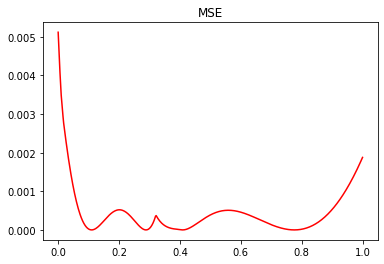

In [398]:
model_layer=[]
prediction_layer=[]
for i,layer in enumerate(model_test.layers):
    model_layer.append(Model(model_test.input , model_test.layers[i].output))
    prediction_layer.append(model_layer[i].predict(trainX))
    
plt.plot(trainX, trainX_true, label='True')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[0],1),1), label='layer0')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[1],1),1), label='layer1')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[2],1),1), label='layer2')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[3],1),1), label='layer3')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[4],1),1), label='layer4')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[5],1),1), label='layer5')
plt.title("Average per layer")
plt.legend()
plt.show()
#plt.close()

plt.plot(trainX, (trainX_true-np.mean(prediction_layer[5],1))**2 , 'r')
#plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[3],1),1), label='layer5')
plt.title("MSE")
plt.show()

Need more neurons

Let's try the infinite width limit

In [43]:
# Empirically, we observe that NNs where the # of nodes are powers of 2 yield more consistent results
[np.round(2**(j/2)) for j in range(30)]

[1.0,
 1.0,
 2.0,
 3.0,
 4.0,
 6.0,
 8.0,
 11.0,
 16.0,
 23.0,
 32.0,
 45.0,
 64.0,
 91.0,
 128.0,
 181.0,
 256.0,
 362.0,
 512.0,
 724.0,
 1024.0,
 1448.0,
 2048.0,
 2896.0,
 4096.0,
 5793.0,
 8192.0,
 11585.0,
 16384.0,
 23170.0]

Epoch 1/30
16/16 [==============================] - 0s 980us/step - loss: 0.1529 - mse: 0.1529
Epoch 2/30
16/16 [==============================] - 0s 1ms/step - loss: 0.0249 - mse: 0.0249
Epoch 3/30
16/16 [==============================] - 0s 1ms/step - loss: 0.0140 - mse: 0.0140
Epoch 4/30
16/16 [==============================] - 0s 1ms/step - loss: 0.0107 - mse: 0.0107
Epoch 5/30
16/16 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0095
Epoch 6/30
16/16 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0090
Epoch 7/30
16/16 [==============================] - 0s 1ms/step - loss: 0.0089 - mse: 0.0089
Epoch 8/30
16/16 [==============================] - 0s 1ms/step - loss: 0.0087 - mse: 0.0087
Epoch 9/30
16/16 [==============================] - 0s 1ms/step - loss: 0.0086 - mse: 0.0086
Epoch 10/30
16/16 [==============================] - 0s 939us/step - loss: 0.0083 - mse: 0.0083
Epoch 11/30
16/16 [==============================] - 0s 1ms/step 

<function matplotlib.pyplot.show(close=None, block=None)>

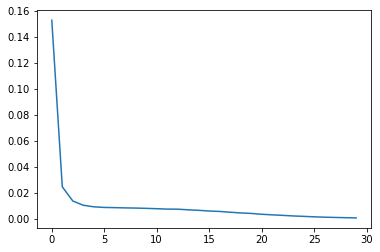

In [11]:
model_test=Sequential()
model_test.add(Dense(8192, input_dim = 1, activation='relu'))
#model_test.add(Dense(2, activation='relu'))
model_test.add(Dense(1, activation='relu'))
model_test.compile(loss='mse', optimizer='Adam', metrics=['mse'])
history=model_test.fit(x=trainX, y=trainX_true, epochs=30, verbose=1)
loss_history = history.history["loss"]
plt.plot(loss_history)
plt.show

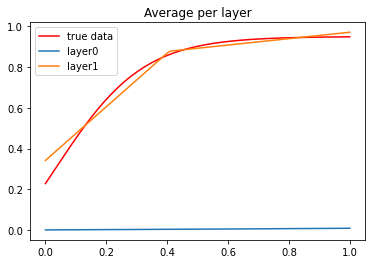

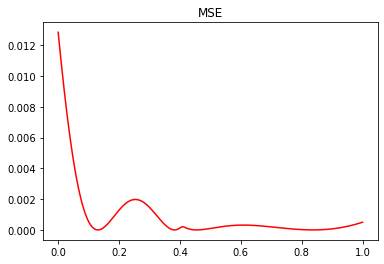

<function matplotlib.pyplot.close(fig=None)>

In [12]:
model_layer=[]
prediction_layer=[]
for i,layer in enumerate(model_test.layers):
    model_layer.append(Model(model_test.input , model_test.layers[i].output))
    prediction_layer.append(model_layer[i].predict(trainX))
    
plt.plot(trainX, trainX_true , 'r', label = 'true data')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[0],1),1), label='layer0')
plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[1],1),1), label='layer1')
#plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[3],1),1), label='layer5')
plt.title("Average per layer")
plt.legend()
plt.show()
plt.close

plt.plot(trainX, (trainX_true-np.mean(prediction_layer[1],1))**2 , 'r')
#plt.plot(trainX, np.expand_dims(np.mean(prediction_layer[3],1),1), label='layer5')
plt.title("MSE")
plt.show()
plt.close

* We observed that 512 wasn't enough to reveal non-linear features.
* With 1024, the NN was discontinuous, but it was able to observe the non-linearity
* With 2048, the kink is steeper; it's still not smooth.
* With 4096, the function is smooth, but it isn't a perfect match
* Really good at 5793: MSE <0.05
* 8192: MSE < 0.0012
* More neurons -> slower. Deeper networks with similar MSE are faster than wider networks